# Estimating with TwoStagesFitter

## Estimation

In the following we apply the estimation method of Meir et al. (2022). Note that the data dataframe must not contain a column named 'C'.

In [4]:
from pydts.fitters import TwoStagesFitter
new_fitter = TwoStagesFitter()
new_fitter.fit(df=patients_df.drop(['C', 'T'], axis=1))
new_fitter.print_summary()

,j1_params,j1_SE,j2_params,j2_SE
covariate,,,,
Z1,0.187949,0.025068,0.040169,0.037807
Z2,-1.100792,0.025610,-1.100246,0.038696
Z3,-1.093466,0.025726,-1.410202,0.039280
Z4,-0.874521,0.025437,-1.097849,0.038642
Z5,-0.652655,0.025280,-0.654501,0.038179




Model summary for event: 1


n_jt  success  alpha_jt
J X                          
1 1   3374     True -0.987702
  2   2328     True -1.220809
  3   1805     True -1.358580
  4   1524     True -1.409997
  5   1214     True -1.530437
  6   1114     True -1.511889
  7    916     True -1.614043
  8    830     True -1.618019
  9    683     True -1.718359
  10   626     True -1.714668
  11   569     True -1.720344
  12   516     True -1.728207
  13   419     True -1.845399
  14   410     True -1.776981
  15   326     True -1.909345
  16   320     True -1.841848
  17   280     True -1.881339
  18   240     True -1.950204
  19   243     True -1.837087
  20   204     True -1.914093
  21   176     True -1.978425
  22   167     True -1.935467
  23   166     True -1.832599
  24   118     True -2.068397
  25   114     True -1.996911
  26   109     True -1.925090
  27    89     True -2.008449
  28    70     True -2.120056
  29    67     True -2.033129
  30    47     True -2.231271



Model summary for event: 2


n_jt  success  alpha_jt
J X                          
2 1   1250     True -1.737087
  2    839     True -1.981763
  3    805     True -1.881945
  4    644     True -1.991485
  5    570     True -1.998569
  6    483     True -2.055976
  7    416     True -2.099660
  8    409     True -2.019652
  9    323     True -2.150486
  10   306     True -2.112509
  11   240     True -2.250577
  12   246     True -2.142076
  13   226     True -2.132065
  14   198     True -2.168557
  15   170     True -2.215715
  16   162     True -2.178298
  17   147     True -2.178342
  18   115     True -2.346988
  19   125     True -2.151499
  20   118     True -2.113865
  21    83     True -2.380588
  22    89     True -2.190208
  23    65     True -2.421944
  24    59     True -2.401785
  25    58     True -2.318061
  26    53     True -2.291874
  27    43     True -2.373117
  28    38     True -2.368179
  29    43     True -2.115566
  30    37     True -2.113986

The model summary table for $\beta_j$ reports the estimated parameters for each risk along with their standard errors. The model summary table for $\alpha_{jt}$ reports, for each $J$ and $X$, the number of observed events (column $n_{jt}$), the status of the optimization procedure (column success), and the estimated parameter $\alpha_{jt}$.

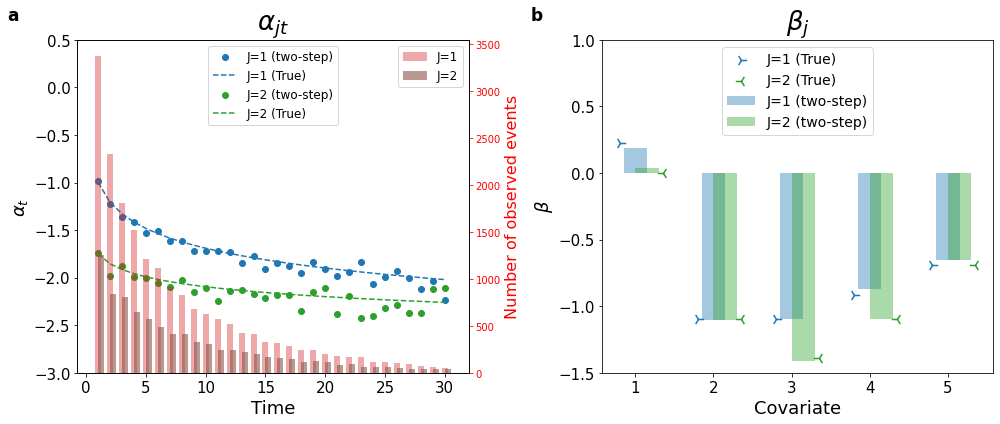

In [5]:
from pydts.examples_utils.plots import plot_second_model_coefs
plot_second_model_coefs(new_fitter.alpha_df, new_fitter.beta_models, new_fitter.times, n_cov=5)

## Standard Error of the Regression Coefficients

In [6]:
new_fitter.get_beta_SE()

,j1_params,j1_SE,j2_params,j2_SE
covariate,,,,
Z1,0.187949,0.025068,0.040169,0.037807
Z2,-1.100792,0.025610,-1.100246,0.038696
Z3,-1.093466,0.025726,-1.410202,0.039280
Z4,-0.874521,0.025437,-1.097849,0.038642
Z5,-0.652655,0.025280,-0.654501,0.038179


## Regularization

It is possible to add regularization when estimating the Beta coefficients. It is done by using the `CoxPHFitter` (*lifelines*) penalizer and `l1_ratio` arguments, which can be passed using the `fit_beta_kwargs` argument to the `fit()` method. The added regularization term is of the form:
$$
\mbox{Penalizer} \cdot \Bigg( \frac{1-\mbox{L1_ratio}}{2}||\beta||_{2}^{2} + \mbox{L1_ratio} ||\beta||_1 \Bigg)
$$
Examples for adding L1, L2 and Elastic Net regularization are followed.

### L1

In [7]:
L1_regularized_fitter = TwoStagesFitter()

fit_beta_kwargs = {
    'model_kwargs': {
        'penalizer': 0.003,
        'l1_ratio': 1
    }
}

L1_regularized_fitter.fit(df=patients_df.drop(['C', 'T'], axis=1), fit_beta_kwargs=fit_beta_kwargs)

L1_regularized_fitter.get_beta_SE()

,j1_params,j1_SE,j2_params,j2_SE
covariate,,,,
Z1,0.000002,0.000102,5.690226e-08,0.000041
Z2,-0.774487,0.025401,-3.574822e-01,0.038251
Z3,-0.762942,0.025533,-6.516077e-01,0.038510
Z4,-0.552172,0.025318,-3.590965e-01,0.038235
Z5,-0.340120,0.025211,-1.435430e-06,0.000132


### L2

In [8]:
L2_regularized_fitter = TwoStagesFitter()

fit_beta_kwargs = {
    'model_kwargs': {
        'penalizer': 0.003,
        'l1_ratio': 0
    }
}

L2_regularized_fitter.fit(df=patients_df.drop(['C', 'T'], axis=1), fit_beta_kwargs=fit_beta_kwargs)

L2_regularized_fitter.get_beta_SE()

,j1_params,j1_SE,j2_params,j2_SE
covariate,,,,
Z1,0.172957,0.024069,0.032774,0.034626
Z2,-1.007262,0.024506,-0.903957,0.035205
Z3,-1.000509,0.024629,-1.162132,0.035589
Z4,-0.799488,0.024384,-0.903531,0.035177
Z5,-0.597079,0.024255,-0.537159,0.034911


### Elastic Net

In [9]:
EN_regularized_fitter = TwoStagesFitter()

fit_beta_kwargs = {
    'model_kwargs': {
        'penalizer': 0.003,
        'l1_ratio': 0.5
    }
}

EN_regularized_fitter.fit(df=patients_df.drop(['C', 'T'], axis=1), fit_beta_kwargs=fit_beta_kwargs)

EN_regularized_fitter.get_beta_SE()

,j1_params,j1_SE,j2_params,j2_SE
covariate,,,,
Z1,0.039322,0.024542,0.000001,0.000190
Z2,-0.895581,0.024938,-0.654614,0.036595
Z3,-0.886332,0.025065,-0.928867,0.036941
Z4,-0.680998,0.024832,-0.655263,0.036573
Z5,-0.473818,0.024711,-0.265356,0.036382


### Separated Penalty Coefficients

The above methods can be applied with a separate penalty coefficient to each of the covariates by passing a vector (with same length as the number of covariates) to the penalizer keyword instead of a scalar. For example, applying L2 regularization only to covariates $Z1$, $Z2$ can be done as follows:

In [10]:
L2_regularized_fitter = TwoStagesFitter()

fit_beta_kwargs = {
    'model_kwargs': {
        'penalizer': np.array([0.04, 0.04, 0, 0, 0]),
        'l1_ratio': 0
    }
}

L2_regularized_fitter.fit(df=patients_df.drop(['C', 'T'], axis=1), fit_beta_kwargs=fit_beta_kwargs)

L2_regularized_fitter.get_beta_SE()

,j1_params,j1_SE,j2_params,j2_SE
covariate,,,,
Z1,0.088314,0.017178,0.011120,0.020019
Z2,-0.515292,0.017378,-0.306194,0.020269
Z3,-1.069182,0.025695,-1.374391,0.039205
Z4,-0.853807,0.025419,-1.066715,0.038602
Z5,-0.641989,0.025272,-0.637811,0.038161


## Prediction

Full prediction is given by the method `predict_cumulative_incident_function()`

The input is a `pandas.DataFrame()` containing for each observation the covariates columns which were used in the `fit()` method ($Z1$-$Z5$ in our example).

The following columns will be added:

1. The overall survival at each time point t
2. The hazard for each failure type $j$ at each time point t
3. The probability of event type $j$ at time t
4. The Cumulative Incident Function (CIF) of event type $j$ at time t

Note that each of the above can be added either separately or for specific times/events if not all columns are required. For example, see partial functions such as `predict_prob_events()`, `predict_hazard_all()`, and others in the API documentation.

In the following, we provide predictions for the individuals with ID values (pid) 0, 1 and 2. We transposed the output for easy view.

In [11]:
pred_df = new_fitter.predict_cumulative_incident_function(
    patients_df.drop(['J', 'T', 'C', 'X'], axis=1).head(3)).set_index('pid').T
pred_df.index.name = ''
pred_df.columns = ['ID=0', 'ID=1', 'ID=2']

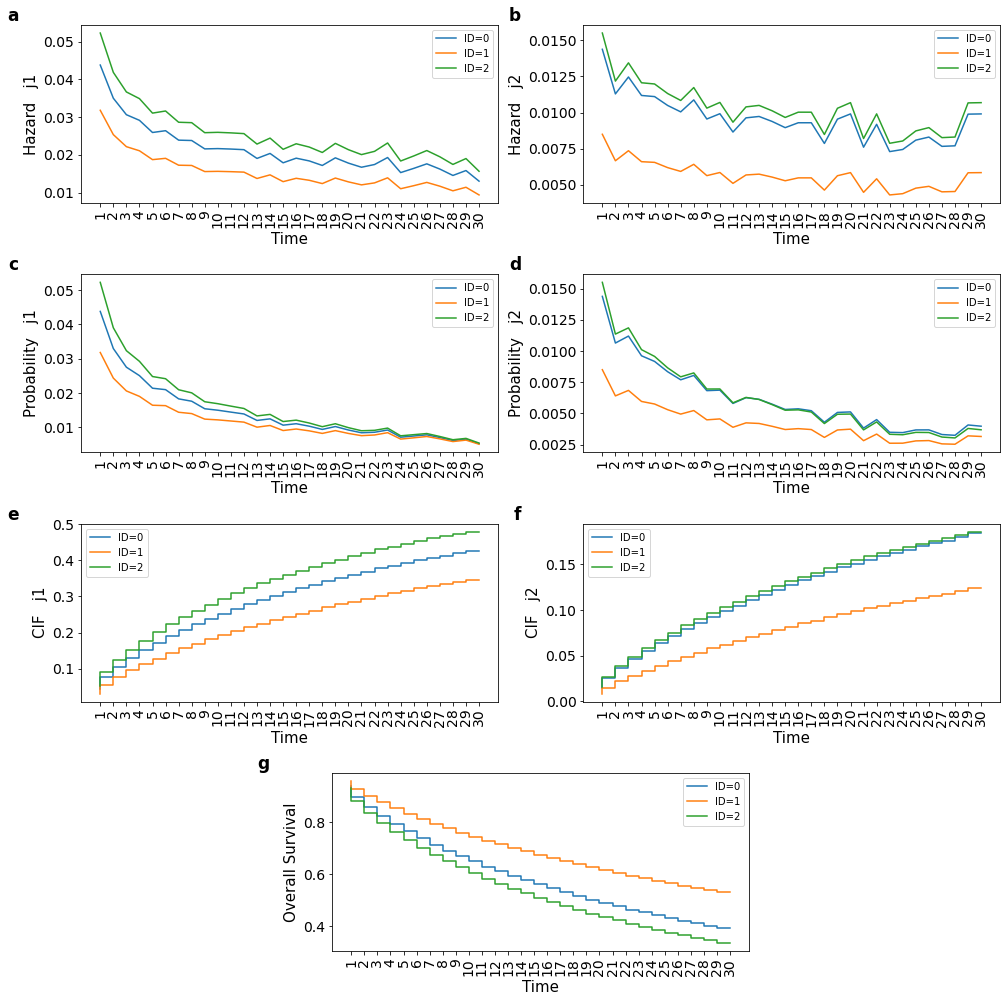

In [12]:
from pydts.examples_utils.plots import plot_example_pred_outputplot_example_pred_output(pred_df)

In [13]:
pred_df

,ID=0,ID=1,ID=2
,,,
Z1,0.548814,0.645894,0.791725
Z2,0.715189,0.437587,0.528895
Z3,0.602763,0.891773,0.568045
Z4,0.544883,0.963663,0.925597
Z5,0.423655,0.383442,0.071036
overall_survival_t1,0.941845,0.959704,0.932244
overall_survival_t2,0.898252,0.928975,0.881883
overall_survival_t3,0.859546,0.901548,0.837705
overall_survival_t4,0.824888,0.876595,0.798379
